## Preprocessing

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import Dense
import os

# Import and read the charity_data.csv from the provided URL
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [21]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
data = application_df.drop(columns=['EIN', 'NAME'])

In [22]:
# Determine the number of unique values in each column
unique_values = data.nunique()

# Display the unique values count for each column
unique_values

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [23]:
# Look at APPLICATION_TYPE value counts to identify and replace with "Other"
application_type_counts = data['APPLICATION_TYPE'].value_counts()
print(application_type_counts)

APPLICATION_TYPE
T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: count, dtype: int64


In [24]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
threshold = 500
application_types_to_replace = application_type_counts[application_type_counts < threshold].index
# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure replacement was successful
application_df['APPLICATION_TYPE'].value_counts()

APPLICATION_TYPE
T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: count, dtype: int64

In [25]:
# Look at CLASSIFICATION value counts to identify and replace with "Other"
classification_counts = data['CLASSIFICATION'].value_counts()
print(classification_counts)

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: count, Length: 71, dtype: int64


In [26]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classification_counts = data['CLASSIFICATION'].value_counts()
print(classification_counts[classification_counts > 1])

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C7200       32
C2300       32
C1240       30
C8000       20
C7120       18
C1500       16
C1800       15
C6000       15
C1250       14
C8200       11
C1238       10
C1278       10
C1235        9
C1237        9
C7210        7
C2400        6
C1720        6
C4100        6
C1257        5
C1600        5
C1260        3
C2710        3
C0           3
C3200        2
C1234        2
C1246        2
C1267        2
C1256        2
Name: count, dtype: int64


In [27]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
threshold = 1000

# Replace rare CLASSIFICATION values with 'Other'
classifications_to_replace = classification_counts[classification_counts < threshold].index
# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure replacement was successful
application_df['CLASSIFICATION'].value_counts()

CLASSIFICATION
C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: count, dtype: int64

In [28]:
# Convert categorical data to numeric with `pd.get_dummies`
application_df_encoded = pd.get_dummies(application_df, drop_first=True)

In [29]:
# Select the first 43 features to match the target parameter count
X = application_df_encoded.iloc[:, :43]
y = application_df_encoded['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [32]:
# Define the model
nn = tf.keras.models.Sequential()

# First hidden layer with dropout and L2 regularization
nn.add(Dense(units=80, activation='relu', input_dim=X_train_scaled.shape[1], kernel_regularizer=l2(0.01)))

# Second hidden layer with dropout and L2 regularization
nn.add(Dense(units=30, activation='relu', kernel_regularizer=l2(0.01)))

# Create the output layer
nn.add(Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 80)             │         3,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 30)             │         2,430 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,981 (23.36 KB)

 Trainable params: 5,981 (23.36 KB)

 Non-trainable params: 0 (0.00 B)

In [33]:
# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
nn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Create a callback that saves the model's weights every five epochs
checkpoint_path = "training_checkpoints/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*len(X_train_scaled) // 32  # Save every 5 epochs
)


In [34]:
history = nn.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[cp_callback], verbose=2)

Epoch 1/100
858/858 - 2s - 2ms/step - accuracy: 0.9864 - loss: 1.1168 - val_accuracy: 0.9999 - val_loss: 0.6556
Epoch 2/100
858/858 - 1s - 829us/step - accuracy: 0.9995 - loss: 0.4554 - val_accuracy: 1.0000 - val_loss: 0.3194
Epoch 3/100
858/858 - 1s - 931us/step - accuracy: 0.9996 - loss: 0.2643 - val_accuracy: 1.0000 - val_loss: 0.2131
Epoch 4/100
858/858 - 1s - 876us/step - accuracy: 0.9997 - loss: 0.1874 - val_accuracy: 1.0000 - val_loss: 0.1597
Epoch 5/100

Epoch 5: saving model to training_checkpoints/cp-0005.weights.h5
858/858 - 1s - 951us/step - accuracy: 0.9999 - loss: 0.1439 - val_accuracy: 1.0000 - val_loss: 0.1266
Epoch 6/100
858/858 - 1s - 876us/step - accuracy: 0.9999 - loss: 0.1152 - val_accuracy: 1.0000 - val_loss: 0.1033
Epoch 7/100
858/858 - 1s - 980us/step - accuracy: 1.0000 - loss: 0.0944 - val_accuracy: 1.0000 - val_loss: 0.0856
Epoch 8/100
858/858 - 1s - 867us/step - accuracy: 1.0000 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.0719
Epoch 9/100
858/858 - 1s

In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=1)
print(f"Test Loss: {model_loss}, Test Accuracy: {model_accuracy}")


215/215 ━━━━━━━━━━━━━━━━━━━━ 0s 793us/step - accuracy: 1.0000 - loss: 0.0065
Test Loss: 0.006461873650550842, Test Accuracy: 1.0


In [36]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity.h5")

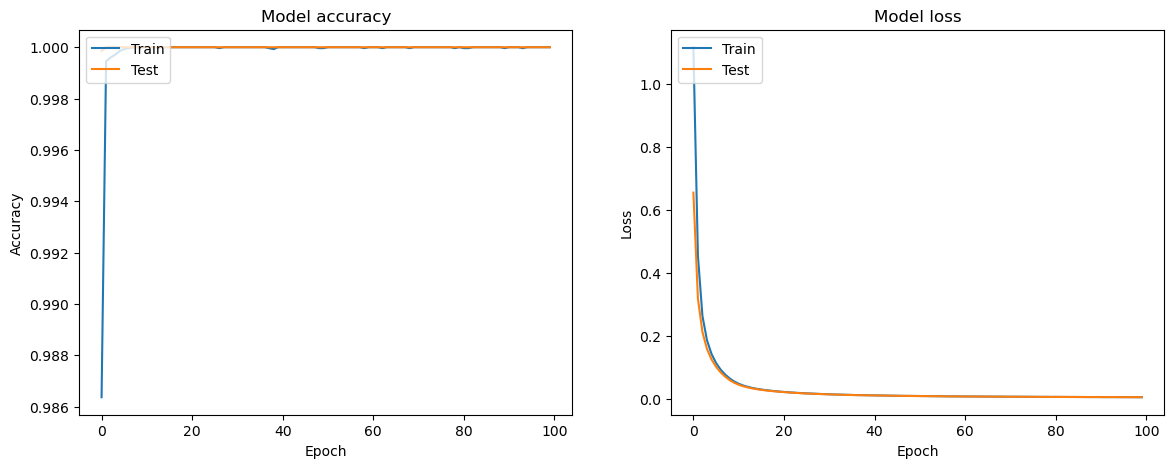

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
